In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
hr_df=pd.read_csv(r'..\Cases\human-resources-analytics\HR_comma_sep.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [ ]:
y= hr_df['salary']
x= hr_df.drop(['salary'],axis=1)
scaler= StandardScaler().set_output(transform='pandas')
scaler


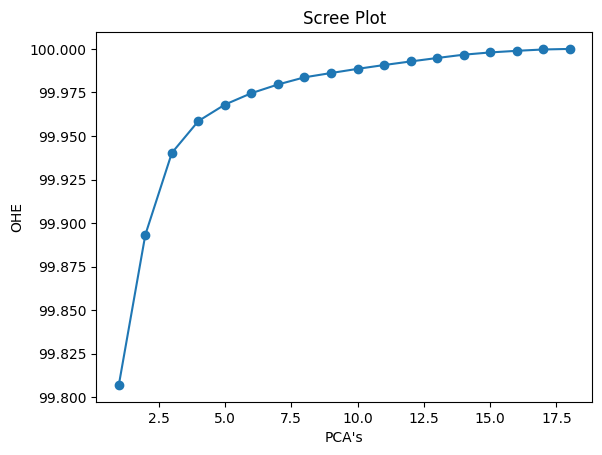

0.7546121360302289


In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from pca import pca
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
data = pd.read_csv(r'..\Cases\human-resources-analytics\HR_comma_sep.csv')
data.columns
X,y = data.drop('left', axis=1), data.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)
ohe  = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),
                              ('passthrough', make_column_selector(dtype_exclude=object)),
                              verbose_feature_names_out=False)
ct = ct.set_output(transform='pandas')
X_trn_ohe = ct.fit_transform(X_train)
X_tst_ohe = ct.fit_transform(X_test)
precomp = PCA().set_output(transform='pandas')
X_trn_pca = precomp.fit_transform(X_trn_ohe)
X_tst_pca = precomp.transform(X_tst_ohe)
np.cumsum(precomp.explained_variance_ratio_ * 100)
plt.scatter(np.arange(1, X_trn_ohe.shape[1]+1), np.cumsum(precomp.explained_variance_ratio_ * 100))
plt.plot(np.arange(1, X_trn_ohe.shape[1]+1), np.cumsum(precomp.explained_variance_ratio_ * 100))
plt.xlabel("PCA's")
plt.ylabel("OHE")
plt.title("Scree Plot")
plt.show()
lr = LogisticRegression()
lr.fit(X_trn_pca.iloc[:,:2] , y_train)

y_pred = lr.predict(X_tst_pca.iloc[:,:2])
print(accuracy_score(y_pred, y_test))


In [ ]:
# using pipeling

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scores=[]
for i in range(1,19):
    scaler=StandardScaler().set_output(transform='pandas')
    pca=PCA(n_components=i).set_output(transform='pandas')
    pipe=Pipeline([('CT',ct),('Scaler',scaler),("PCA",pca),('LR',lr)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append([i,accuracy_score(y_test,y_pred)])
scores_df=pd.DataFrame(scores,columns=['n_components','accuracy_score'])
scores_df.sort_values(by='accuracy_score',ascending=False,inplace=True)
scores_df.head()


,n_components,accuracy_score
16,17,0.801289
17,18,0.799066
15,16,0.786397
8,9,0.782396
9,10,0.781507


### for Bank dataset

In [20]:
bank=pd.read_csv(r'..\Cases\bank\bank.csv',delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
x,y=bank.drop('y',axis=1),bank['y']

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25, stratify=y)
ohe  = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),
                              ('passthrough', make_column_selector(dtype_exclude=object)),
                              verbose_feature_names_out=False)
ct = ct.set_output(transform='pandas')
lr = LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()

In [42]:
scores=[]
n_comp=[0.65,0.7,0.75,0.8,0.85,0.9]
# for i in range(1,19):
for i in n_comp:
    scaler=StandardScaler().set_output(transform='pandas')
    pca=PCA(n_components=i).set_output(transform='pandas')
    pipe=Pipeline([('CT',ct),('Scaler',scaler),("PCA",pca),('knn',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append([i,accuracy_score(y_test,y_pred)])
scores_df=pd.DataFrame(scores,columns=['n_components','accuracy_score'])
scores_df.sort_values(by='accuracy_score',ascending=False,inplace=True)
scores_df.head()

,n_components,accuracy_score
0,0.65,0.892410
5,0.90,0.890199
4,0.85,0.890199
1,0.70,0.888725
3,0.80,0.888725


For multiple models

In [ ]:
scores=[]
n_comp=[0.65,0.7,0.75,0.8,0.85,0.9,0.95]
models=[lr,knn,gnb]
# for i in range(1,19):
for i in n_comp:
    for m in models:
        scaler=StandardScaler().set_output(transform='pandas')
        pca=PCA(n_components=i).set_output(transform='pandas')
        pipe=Pipeline([('CT',ct),('Scaler',scaler),("PCA",pca),('models',m)])
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        scores.append([i,m,accuracy_score(y_test,y_pred)])
scores_df=pd.DataFrame(scores,columns=['n_components','Model','accuracy_score'])
scores_df.sort_values(by='accuracy_score',ascending=False,inplace=True)
scores_df.head()

,n_components,Model,accuracy_score
18,0.95,LogisticRegression(),0.901253
12,0.85,LogisticRegression(),0.899779
3,0.70,LogisticRegression(),0.899042
6,0.75,LogisticRegression(),0.898305
0,0.65,LogisticRegression(),0.897568
